# Fall Problem Session 11
## CIFAR-10 I

In this notebook you will work on problems that relate to our neural network content. In particular, this material will touch on the following lecture notebooks:
- `Lectures/Neural Networks/1. Perceptrons`,
- `Lectures/Neural Networks/2. The MNIST Data Set`,
- `Lectures/Neural Networks/3. Multilayer Neural Networks` and
- `Lectures/Neural Networks/4. keras`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load and inspect the data

In this notebook you will work to build neural networks to classify the images found in the CIFAR-10 collection. Before building any models you will need to load and get to know the data.

##### a. 

Import `cifar10` from `keras.datasets`.

##### Sample Solution

In [2]:
from keras.datasets import cifar10

##### b.

Look throught the `keras` documentation on the `cifar10` data to see how to load the training and test data.

Documentation: <a href="https://keras.io/api/datasets/cifar10/">https://keras.io/api/datasets/cifar10/</a>

<i>Note: The step of loading the data may take a while if this is your first time loading the data.</i>

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
## run this code chunk, you'll use it in a bit.
label_dict = {0:'airplane',
                 1:'automobile',
                 2:'bird',
                 3:'cat',
                 4:'deer',
                 5:'dog',
                 6:'frog',
                 7:'horse',
                 8:'ship',
                 9:'truck'}

##### c.

The CIFAR (Canadian Institute for Advanced Research) 10 data are a collection of $60{,}000$ $32\times 32$ pixelated color images each being an instance of one of the 10 possible classes listed above. Each of the ten classes has $6{,}000$ instances ($5{,}000$ in the training set, $1{,}000$ in the test set). Here is a link to the documentation for this data set, <a href="https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html</a>.

- Look at the shape of `X_train`. 
- Print out the first observation of the training set.
- Then run the given code chunk to see some example images.

##### Sample Solution

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[0]

array([6], dtype=uint8)

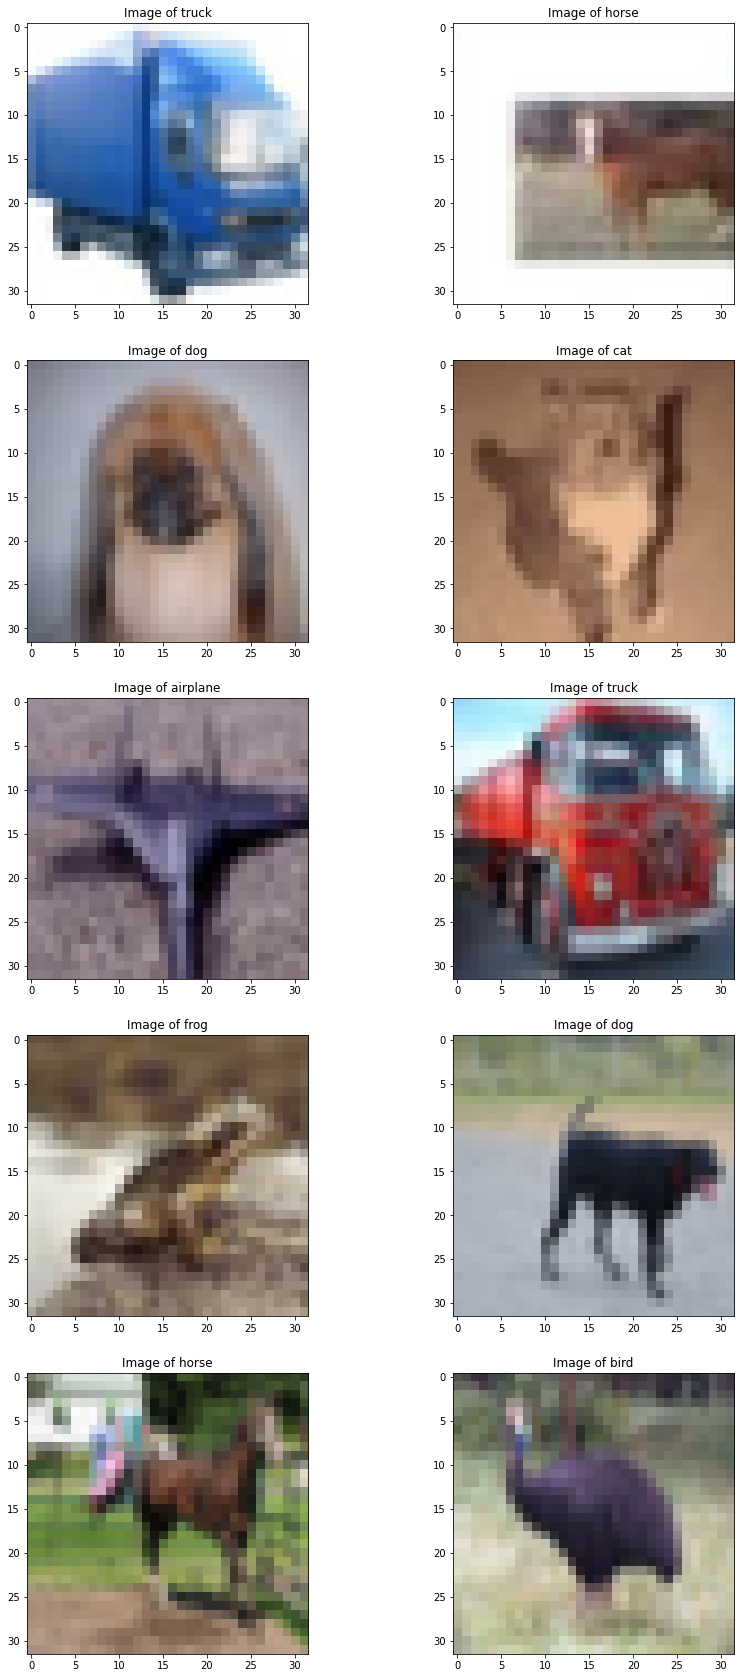

In [8]:
np.random.seed(38401)

fig,ax = plt.subplots(5,2,figsize=(14, 30))

j = 0
for i in np.random.choice(range(len(y_train)), 10):
    ax[j//2, j%2].imshow(X_train[i,:,:])
    
    ax[j//2, j%2].set_title("Image of " + label_dict[y_train[i][0]])
    
    j = j + 1
    
plt.show()

#### 3. Prepare the data

We will need to prepare the data before we can build a model.

##### a.

Just like we did for the grayscale MNIST images you will need to scale the pixels so they range from $0$ to $1$. Each of the RGB pixel values have a minimum value of $0$ and a maximum value of $255$.

Scale the data in the code cells provided below.

##### Sample Solution

In [9]:
X_train = X_train/255
X_test = X_test/255

##### b.

In this notebook you will use a feed forward neural network, that means you will need to reshape the array to be a 2D `numpy` array where each row is an observation and each column is one of the pixel values.

Reshape the data in the cells provided below.

##### Sample Solution

In [10]:
X_train_r = X_train.reshape(X_train.shape[0], -1)
X_test_r = X_test.reshape(X_test.shape[0], -1)

##### c.

This is an instance where cross-validation would take too long for the purposes of the problem session. We will instead use the validation set approach for model comparisons. Make a validation split of the training set. Use $15\%$ of the data for the validation set.

##### Sample Solution

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train_r, y_train,
                                               shuffle=True,
                                               random_state=294,
                                               test_size=.15,
                                               stratify=y_train)

#### 4. Your first neural network

In this problem you will build your first neural network.

##### a.

Import all of the `keras` stuff you need to build a feed forward neural network. 

##### Sample Solution

In [13]:
## Import the following
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical


### If you have an earlier version of keras ###
# from keras.utils import to_categorical

##### b.

Fill in the missing code chunks below to build a feed forward neural network with a single hidden layer with $50$ nodes.

<i>Note: if this network takes a long time to train on your computer, feel free to make the hidden layer smaller. That will speed up the training steps a little bit.</i>

##### Sample Solution

In [14]:
## Create an empty model object here
model1 =  models.Sequential()

## Add the hidden layer with 50 nodes,
## remember to specify the activation function and the input_shape
model1.add(layers.Dense(50, activation='relu', input_shape=(X_tt.shape[1],)))

## Add the output layer, how many nodes should this have?
## what should the activation function be?
model1.add(layers.Dense(10, activation='softmax'))


## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model1.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

## You'll train the model for 40 epochs
n_epochs = 40

## fit the model here, don't forget to place the
## ys in to_categorical
## use a batch_size of 512
## don't forget to include the validation_data
history1 = model1.fit(X_tt,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))

Epoch 1/40
 1/84 [..............................] - ETA: 12s - loss: 2.5324 - accuracy: 0.0879

2022-09-21 13:18:38.075584: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-21 13:18:38.075761: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


84/84 [==============================] - 1s 5ms/step - loss: 2.4568 - accuracy: 0.1683 - val_loss: 2.5525 - val_accuracy: 0.1451
Epoch 2/40
84/84 [==============================] - 0s 4ms/step - loss: 2.1357 - accuracy: 0.2282 - val_loss: 3.0640 - val_accuracy: 0.1208
Epoch 3/40
84/84 [==============================] - 0s 4ms/step - loss: 2.0235 - accuracy: 0.2771 - val_loss: 3.9535 - val_accuracy: 0.1069
Epoch 4/40
84/84 [==============================] - 0s 4ms/step - loss: 1.9678 - accuracy: 0.3005 - val_loss: 2.2006 - val_accuracy: 0.2293
Epoch 5/40
84/84 [==============================] - 0s 4ms/step - loss: 1.9245 - accuracy: 0.3094 - val_loss: 2.2555 - val_accuracy: 0.1984
Epoch 6/40
84/84 [==============================] - 0s 4ms/step - loss: 1.8861 - accuracy: 0.3300 - val_loss: 2.3774 - val_accuracy: 0.2276
Epoch 7/40
84/84 [==============================] - 0s 4ms/step - loss: 1.8635 - accuracy: 0.3408 - val_loss: 2.7878 - val_accuracy: 0.1872
Epoch 8/40
84/84 [=============

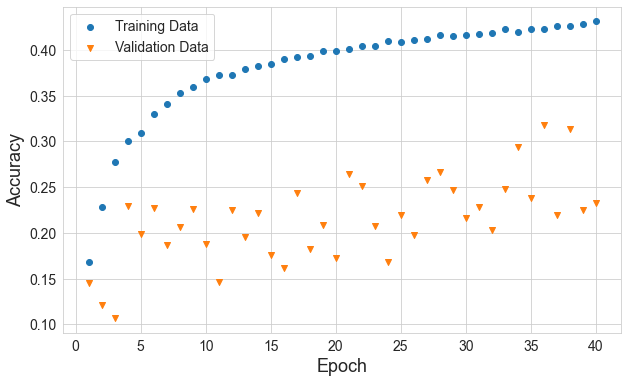

In [15]:
## Plot the training and validation accuracies here
history_dict1 = history1.history

sns.set_style("whitegrid")

plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

#### 5. Additional neural networks

In this problem you will make a couple more feed forward networks to try and improve upon the performance of your first network.

##### a.

Try making another feed forward network with a single layer. Increase the size of the hidden layer, as compared to model 1.

Does it outperform model 1?

##### Sample Solution

In [16]:
## Create an empty model object here
model2 =  models.Sequential()

## Add the hidden layer with 250 nodes,
## remember to specify the activation function and the input_shape
model2.add(layers.Dense(250, activation='relu', input_shape=(X_tt.shape[1],)))

## Add the output layer, how many nodes should this have?
## what should the activation function be?
model2.add(layers.Dense(10, activation='softmax'))


## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

## You'll train the model for 40 epochs
n_epochs = 40

## fit the model here, don't forget to place the
## ys in to_categorical
## use a batch_size of 512
## don't forget to include the validation_data
history2 = model2.fit(X_tt,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))

Epoch 1/40
84/84 [==============================] - 1s 12ms/step - loss: 2.9345 - accuracy: 0.1890 - val_loss: 4.2715 - val_accuracy: 0.1081
Epoch 2/40
84/84 [==============================] - 1s 10ms/step - loss: 2.1512 - accuracy: 0.2448 - val_loss: 3.2941 - val_accuracy: 0.1215
Epoch 3/40
84/84 [==============================] - 1s 11ms/step - loss: 2.0026 - accuracy: 0.2899 - val_loss: 2.7603 - val_accuracy: 0.1872
Epoch 4/40
84/84 [==============================] - 1s 11ms/step - loss: 1.9312 - accuracy: 0.3145 - val_loss: 2.9742 - val_accuracy: 0.1605
Epoch 5/40
84/84 [==============================] - 1s 10ms/step - loss: 1.8782 - accuracy: 0.3319 - val_loss: 2.7788 - val_accuracy: 0.1725
Epoch 6/40
84/84 [==============================] - 1s 10ms/step - loss: 1.8252 - accuracy: 0.3511 - val_loss: 2.3678 - val_accuracy: 0.2187
Epoch 7/40
84/84 [==============================] - 1s 12ms/step - loss: 1.7948 - accuracy: 0.3656 - val_loss: 2.1932 - val_accuracy: 0.2924
Epoch 8/40
84

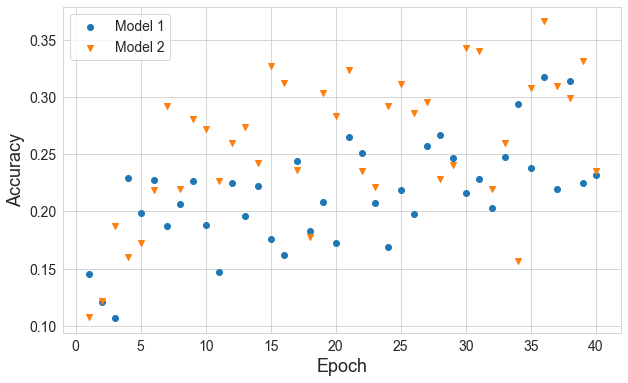

In [17]:
## Plot the validation accuracies of models 1 and 2 here
history_dict2 = history2.history

plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            label="Model 1")
plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'], 
            marker='v',
            label="Model 2")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

##### b. 

Now try making a feed forward network with two hidden layers. Choose whatever size you would like for those layers. How does this compare to the other two models you have made?

##### Sample Solution

In [18]:
## Create an empty model object here
model3 =  models.Sequential()

## Add the hidden layers
model3.add(layers.Dense(100, activation='relu', input_shape=(X_tt.shape[1],)))
model3.add(layers.Dense(100, activation='relu'))


## Add the output layer, how many nodes should this have?
## what should the activation function be?
model3.add(layers.Dense(10, activation='softmax'))


## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model3.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

## You'll train the model for 40 epochs
n_epochs = 40

## fit the model here, don't forget to place the
## ys in to_categorical
## use a batch_size of 512
## don't forget to include the validation_data
history3 = model3.fit(X_tt,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))

Epoch 1/40
84/84 [==============================] - 1s 6ms/step - loss: 2.3152 - accuracy: 0.1809 - val_loss: 3.9972 - val_accuracy: 0.1465
Epoch 2/40
84/84 [==============================] - 1s 6ms/step - loss: 2.0493 - accuracy: 0.2679 - val_loss: 3.0227 - val_accuracy: 0.1689
Epoch 3/40
84/84 [==============================] - 1s 6ms/step - loss: 1.9439 - accuracy: 0.3023 - val_loss: 2.3143 - val_accuracy: 0.1989
Epoch 4/40
84/84 [==============================] - 0s 6ms/step - loss: 1.8659 - accuracy: 0.3308 - val_loss: 2.6602 - val_accuracy: 0.1601
Epoch 5/40
84/84 [==============================] - 1s 6ms/step - loss: 1.8286 - accuracy: 0.3452 - val_loss: 2.1348 - val_accuracy: 0.2752
Epoch 6/40
84/84 [==============================] - 1s 7ms/step - loss: 1.7783 - accuracy: 0.3632 - val_loss: 2.6201 - val_accuracy: 0.2389
Epoch 7/40
84/84 [==============================] - 1s 6ms/step - loss: 1.7605 - accuracy: 0.3739 - val_loss: 2.1678 - val_accuracy: 0.2561
Epoch 8/40
84/84 [==

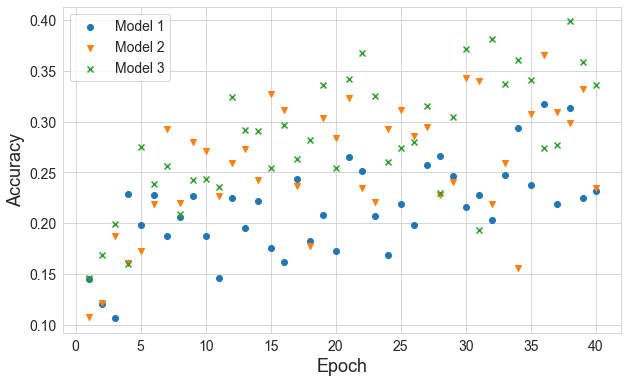

In [19]:
## Plot the validation accuracies of all three models here
history_dict3 = history3.history

plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            label="Model 1")
plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'], 
            marker='v',
            label="Model 2")
plt.scatter(range(1,n_epochs+1), 
            history_dict3['val_accuracy'], 
            marker='x',
            label="Model 3")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

#### 6. Trying more processed data

Now you will explore if pre-processing the data further will improve the model performance.


##### a.

Use the function below to convert the original RGB image into grayscale. Then create a neural network for this new version of the data that has the same architecture as one of your networks from above.

In [20]:
def to_grayscale(X):
    return 0.2989*X[:,:,:,0] + 0.5870*X[:,:,:,1] + 0.1140*X[:,:,:,2]

##### Sample Solution

In [21]:
X_train_g = to_grayscale(X_train).reshape(X_train.shape[0], -1)

X_tt_g, X_val_g, y_tt_g, y_val_g = train_test_split(X_train_g, y_train,
                                                       shuffle=True,
                                                       random_state=294,
                                                       test_size=.15,
                                                       stratify=y_train)

In [22]:
## Create an empty model object here
model4 =  models.Sequential()

## Add the hidden layers
model4.add(layers.Dense(100, activation='relu', input_shape=(X_tt_g.shape[1],)))
model4.add(layers.Dense(100, activation='relu'))


## Add the output layer, how many nodes should this have?
## what should the activation function be?
model4.add(layers.Dense(10, activation='softmax'))


## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model4.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

## You'll train the model for 40 epochs
n_epochs = 40

## fit the model here, don't forget to place the
## ys in to_categorical
## use a batch_size of 512
## don't forget to include the validation_data
history4 = model4.fit(X_tt_g,
                       to_categorical(y_tt_g),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val_g, to_categorical(y_val_g)))

Epoch 1/40
84/84 [==============================] - 0s 3ms/step - loss: 2.1965 - accuracy: 0.1895 - val_loss: 2.4968 - val_accuracy: 0.1383
Epoch 2/40
84/84 [==============================] - 0s 3ms/step - loss: 2.0875 - accuracy: 0.2424 - val_loss: 2.8924 - val_accuracy: 0.1301
Epoch 3/40
84/84 [==============================] - 0s 3ms/step - loss: 2.0269 - accuracy: 0.2706 - val_loss: 4.0142 - val_accuracy: 0.1319
Epoch 4/40
84/84 [==============================] - 0s 3ms/step - loss: 1.9905 - accuracy: 0.2940 - val_loss: 2.2308 - val_accuracy: 0.2345
Epoch 5/40
84/84 [==============================] - 0s 3ms/step - loss: 1.9392 - accuracy: 0.3069 - val_loss: 2.7555 - val_accuracy: 0.1541
Epoch 6/40
84/84 [==============================] - 0s 3ms/step - loss: 1.9174 - accuracy: 0.3166 - val_loss: 2.2563 - val_accuracy: 0.1961
Epoch 7/40
84/84 [==============================] - 0s 3ms/step - loss: 1.8888 - accuracy: 0.3269 - val_loss: 2.1183 - val_accuracy: 0.2441
Epoch 8/40
84/84 [==

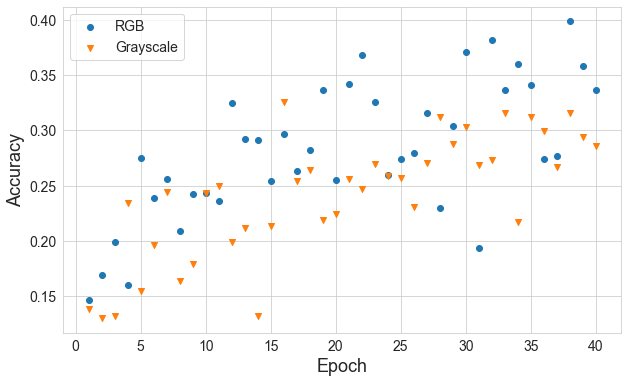

In [23]:
## Plot the validation accuracy of the RGB version of the model
## and the grayscale version of the model here
history_dict4 = history4.history

plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict3['val_accuracy'], 
            label="RGB")
plt.scatter(range(1,n_epochs+1), 
            history_dict4['val_accuracy'], 
            marker='v',
            label="Grayscale")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

##### b. 

Now try running the original RGB image data through PCA that captures $90\%$ of the original data's variance, then build a neural network (with the same architecture as the network in part <i>a.</i>) on that data.

##### Sample Solution

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(.9)

X_tt_pca = pca.fit_transform(X_tt)
X_val_pca = pca.transform(X_val)

In [26]:
## Create an empty model object here
model5 =  models.Sequential()

## Add the hidden layers
model5.add(layers.Dense(100, activation='relu', input_shape=(X_tt_pca.shape[1],)))
model5.add(layers.Dense(100, activation='relu'))


## Add the output layer, how many nodes should this have?
## what should the activation function be?
model5.add(layers.Dense(10, activation='softmax'))


## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model5.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

## You'll train the model for 40 epochs
n_epochs = 40

## fit the model here, don't forget to place the
## ys in to_categorical
## use a batch_size of 512
## don't forget to include the validation_data
history5 = model5.fit(X_tt_pca,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val_pca, to_categorical(y_val)))

Epoch 1/40
84/84 [==============================] - 0s 1ms/step - loss: 1.8729 - accuracy: 0.3333 - val_loss: 1.7726 - val_accuracy: 0.3613
Epoch 2/40
84/84 [==============================] - 0s 1ms/step - loss: 1.6448 - accuracy: 0.4200 - val_loss: 1.6652 - val_accuracy: 0.4067
Epoch 3/40
84/84 [==============================] - 0s 1ms/step - loss: 1.5552 - accuracy: 0.4536 - val_loss: 1.6163 - val_accuracy: 0.4231
Epoch 4/40
84/84 [==============================] - 0s 1ms/step - loss: 1.4967 - accuracy: 0.4724 - val_loss: 1.5615 - val_accuracy: 0.4411
Epoch 5/40
84/84 [==============================] - 0s 1ms/step - loss: 1.4511 - accuracy: 0.4898 - val_loss: 1.5536 - val_accuracy: 0.4525
Epoch 6/40
84/84 [==============================] - 0s 1ms/step - loss: 1.4129 - accuracy: 0.5002 - val_loss: 1.5418 - val_accuracy: 0.4524
Epoch 7/40
84/84 [==============================] - 0s 1ms/step - loss: 1.3822 - accuracy: 0.5132 - val_loss: 1.5049 - val_accuracy: 0.4657
Epoch 8/40
84/84 [==

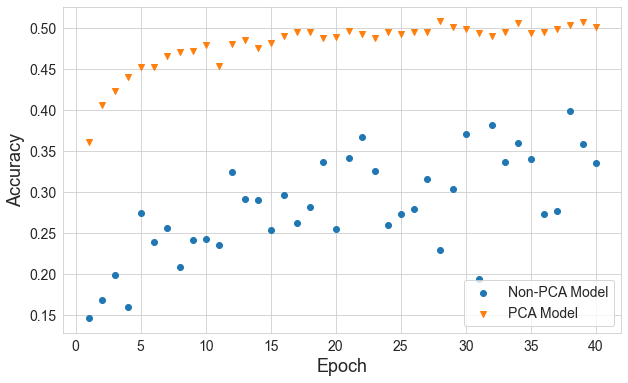

In [27]:
## Plot the validation accuracy of the Non-PCA version of the model
## and the PCA version of the model here

history_dict5 = history5.history

plt.figure(figsize=(10,6))

plt.scatter(range(1,n_epochs+1), 
            history_dict3['val_accuracy'], 
            label="Non-PCA Model")
plt.scatter(range(1,n_epochs+1), 
            history_dict5['val_accuracy'], 
            marker='v',
            label="PCA Model")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

#### 7. Saving a model

##### a.

Choose one of the models you built in this session and retrain it to the optimal number of epochs. Store the model in a variable just called `model`.

##### Sample Solution

In [28]:
## Create an empty model object here
model =  models.Sequential()

## Add the hidden layers
model.add(layers.Dense(100, activation='relu', input_shape=(X_tt_pca.shape[1],)))
model.add(layers.Dense(100, activation='relu'))


## Add the output layer, how many nodes should this have?
## what should the activation function be?
model.add(layers.Dense(10, activation='softmax'))


## Compile the network here with
## the 'rmsprop' optimizer, the 'categorical_crossentropy' loss and
## 'accuracy' as the only metric
model.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

## You'll train the model for 40 epochs
n_epochs = 20

## fit the model here, don't forget to place the
## ys in to_categorical
## use a batch_size of 512
## don't forget to include the validation_data
history = model.fit(X_tt_pca,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val_pca, to_categorical(y_val)))

Epoch 1/20
84/84 [==============================] - 0s 2ms/step - loss: 1.9087 - accuracy: 0.3235 - val_loss: 1.7724 - val_accuracy: 0.3623
Epoch 2/20
84/84 [==============================] - 0s 1ms/step - loss: 1.6485 - accuracy: 0.4201 - val_loss: 1.6604 - val_accuracy: 0.4085
Epoch 3/20
84/84 [==============================] - 0s 1ms/step - loss: 1.5595 - accuracy: 0.4525 - val_loss: 1.6464 - val_accuracy: 0.4237
Epoch 4/20
84/84 [==============================] - 0s 1ms/step - loss: 1.5032 - accuracy: 0.4744 - val_loss: 1.5965 - val_accuracy: 0.4333
Epoch 5/20
84/84 [==============================] - 0s 1ms/step - loss: 1.4594 - accuracy: 0.4889 - val_loss: 1.5474 - val_accuracy: 0.4545
Epoch 6/20
84/84 [==============================] - 0s 1ms/step - loss: 1.4218 - accuracy: 0.5019 - val_loss: 1.5765 - val_accuracy: 0.4428
Epoch 7/20
84/84 [==============================] - 0s 1ms/step - loss: 1.3906 - accuracy: 0.5119 - val_loss: 1.5478 - val_accuracy: 0.4507
Epoch 8/20
84/84 [==

##### b.

Running the code below will save your trained model to a file that can be reloaded at a later time.

Save your model, you will return to it in `Fall Problem Session 12`.

##### Sample Solution

In [29]:
#### fill in a model name here
model_filename = "matt_model_fall_pb_sess_11"

model.save(model_filename)

INFO:tensorflow:Assets written to: matt_model_fall_pb_sess_11/assets


2022-09-21 13:20:58.193436: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


That's all for this notebook. You may have noticed that none of your models are particularly good. This is a difficult classification problem and you will continue working on it in `Fall Problem Session 12`. Perhaps we can improve model performance.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)